# The Normal Distribution


In [ ]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

# The Normal distribution

(aka. The "Gaussian" distribution)

This is perhaps the most useful distribution to get comfortable with at this stage in your learning so let's look at some key features.

The normal distribution is used to describe **continuous** random variables, that is, variables that can take any value in a given range. It can be used to approximate **discrete** random variables in some cases.

The normal distribution is the “bell shaped” pattern of data whenever you measure a population or set of scores with some randomness. 
e.g. 
- Measures of size of living tissue
- Physiological measurements, e.g. height, weights, blood pressure of adult humans
- Size of tree-trunks
- The logarithm of exchange rates, price indices, and stock market indices are assumed to follow a Normal distribution
- In science, the measurement errors in experiments are often assumed to be normally distributed

For this reason we can use it as a model in many instances as we are often looking at naturally occuring random variables.

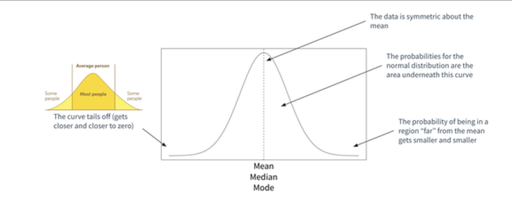

- The mean, median and mode are **equal**
- The distribution is symmetrical and **not** skewed
- Values close to the mean are most likely to occur
- The probability of a value occuring tails off either side of the mean so that the probability of a value being more or less than three standard deviations from the mean is close to zero



### The Empirical Rule

The normal distribution has the following property:
- 68.2% of the data will lie within one standard deviation around the mean
- 95.4% of the data will lie within two standard deviations around the mean
- 99.7% of the data will lie within three standard deviations around the mean

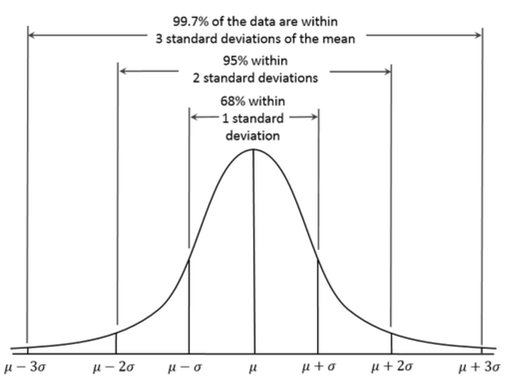

### Defining parameters

The normal distribution can take many different shapes depending on the values of the two **key parameters** that define it:

- The mean (often referred to as "mu" $\mu$ in the notation) 
- The standard deviaton (often referred to as "sigma" $\sigma$)

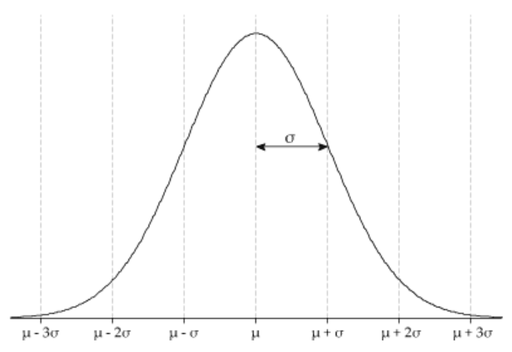

### Difference in mu and sigma
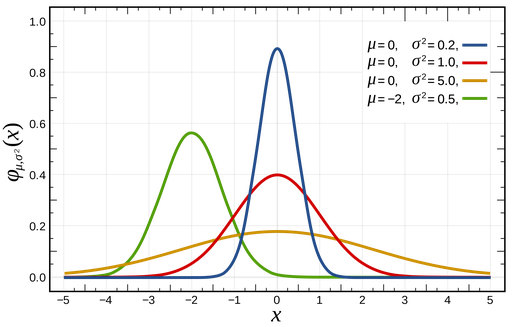

#### We will explore effect of changing the values of mu and sigma on the graph of the normal distribution. We will also look at how to draw a random sample from a normal distribution and the effect of sample size on fit

In [ ]:
# Define the parameters of the distribution
mu = 161
sigma = 6

# Plot the normal curve for the above parameters. linspace()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# We can also generate random samples from a distribution with any mean and standard deviation
x = np.random.normal(mu, sigma, size=5000)

# Plot the histogram
plt.hist(x, bins=100, density=True, alpha=0.6, color='b')

plt.show()

### Many naturally occuring measurements are normally distributed so we will look at some heights data to illustrate. 
Load the data into a pandas dataframe called 'df' using pandas read_csv

In [ ]:
df = pd.read_csv('data/weight-height.csv')

In [ ]:
# Take a look at the data.
df.head()

In [ ]:
df.describe()

In [ ]:
df.Height.describe()

### Many times during data exploration you might want to plot this kind of histogram to look at the distribution

In [ ]:
sns.histplot(df.Height, kde=True)
plt.title("Histogram showing the Distribution of Height.");

In [ ]:
df.Height.mean()

In [ ]:
df.Height.median()

In [ ]:
df.Height.mode()

In [ ]:
df.Height.value_counts()

In [ ]:
# How do you find the MODE? 
stats.mode(df.Height)

### We might also want to review the mean median and mode to check the data is sufficiently symmetrical. This helps us to decide is the normal distribution is a suitable model

In [ ]:
x = df.Height.mean()
y = df.Height.median()
z = stats.mode(df.Height)

print("The mean height is %g, the median height is %g and the modal height is %g" %(x,y,z[0]))

<font color='green'> 
    
### Discussion point 
Do you think a normal distribution would be an appropriate model for the heights data?



## Outlier identification

There are many different ways that we can identify outliers. **name one?**

In a normal distribution the probability of a data point existing that falls more than three standard deviations away from the mean is very small. We could therefore define values lying outside this to be outliers.

Such outliers can **skew** our model and it might be appropriate to remove them in some cases. This is an example of an application in data cleaning.

In [ ]:
mean = df.Height.mean()
std_deviation = df.Height.std()
mean - 3*std_deviation

In [ ]:
# Identifying outliers

df[(df.Height > 77.91) | (df.Height < 54.82)]

In [ ]:
df_no_outlier = df[(df.Height < 77.91) & (df.Height > 54.82)]
df_no_outlier.describe()

## Calculating probabilities from the normal distribution (p-values)

If we have a dataset that appears to be **normally distributed** we can use the normal curve as a model to predict the probabilities of different outcomes.

We just need to know the mean and standard deviation that would define the unique curve to fit our data and we can use this to **look up** the corresponding probabilities of variable values. 

The normal distribution is a **continuous** distribution therefore is it not possible to define probabilities of exact values.

However we are able to calculate probabilties for **ranges of values** - these probabilities are known as **cumulative probabilities**.



**Examples**

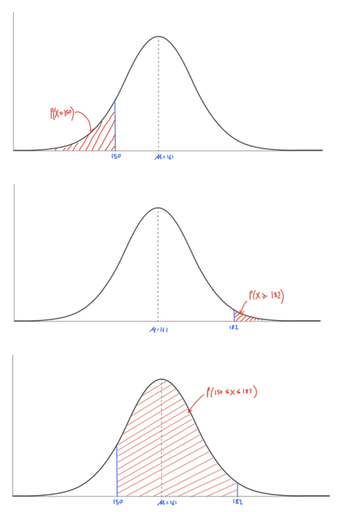

### As an example let's calculate the theoretical probability of the outlier heights occuring

#### CDF - cumulative distribution function

Cumulative frequency is used to determine the number of observations that lie above (or below) a particular value in a data set

#### PPF - percent point function  
This is the inverse of the cumulative distribution function.

- Use stats.norm.cdf to return cumulative probabilities for "less than"
- Use stats.norm.sf to return cumulative probabilities for "greater than"
- For probabilities "between" subtract two probabilities from one another using stats.norm.cdf

In [ ]:
# Define distribution of variable
x = stats.norm(161,7)

# Diagram 1
p_value1 = stats.norm(161,7).cdf(150)
print(p_value1)

# Diagram 2
p_value2 = stats.norm(161,7).sf(182)
print(p_value2)

# Diagram 3
p_value3 = stats.norm(161,7).cdf(182) - stats.norm(161,7).cdf(150)
print(p_value3)

# Experiment here with some others

#### It's also possible to work backwards from a probabilty to a "critial value" of our variable

In [ ]:
# e.g. to return the height for which the probabilty of being less than that height is 0.25:
stats.norm(161,7).ppf(0.25)

# Experiment here with some others

## Z-scores 

If you know about standard deviation, then you already know what a z-score is!

In relation to a normal distribution, the z-score is just the **number of standard deviations** that a given data point is away from the mean.

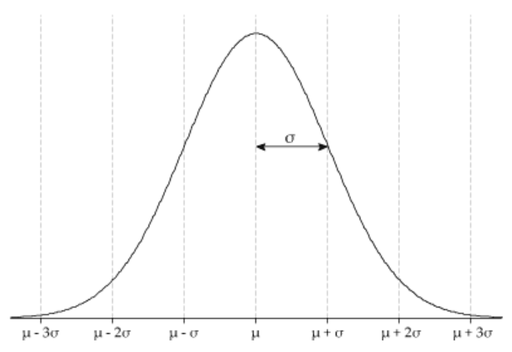

If I have a data point that is 2 standard deviations from the mean then the z-score will be 2.

If I have a data point that is -1.5 standard deviations from the mean then the z-score will be -1.5.

And so on!

### Applications

Z-scores can be used for example to identify outliers in a dataset that is normally distributed.

### Calculating the z-score

In order to calculate the z-score we just need to subtract the mean from our data point and divide by the standard deviation:

$$ z = \frac{x_{i} - \mu}{\sigma}$$


#### Say I wanted to calculate a z-score for a height of 150

In [ ]:
mu = 161
sigma = 7

z = (150 - mu) / sigma
z

#### Say I wanted to calculate a z-score for every item in my heights dataset

In [ ]:
df['zscore'] = (df.Height - df.Height.mean())/df.Height.std()

In [ ]:
df.head()

In [ ]:
# Example of sorting for outliers

df[(df.zscore>3) | (df.zscore<-3)]

### Applications continued

Both z-scores and p-values can be used as a measure of **significance**. The lower the z-score, the more typical a data point is and the more likely it is to occur. Higher z-scores are less typical and are less likely to occur. Equally, we could say that a p-value of less than say 1% means that a data point is not typical, or a p-value of 25% is more typical, and so on.

Z-scores can also be used to set **critical values** of a test statistic above or below which we deem it to be "statistically significant". This can be useful for drawing conclusions for example in hypothesis tests. p-values can be used in the same way also.





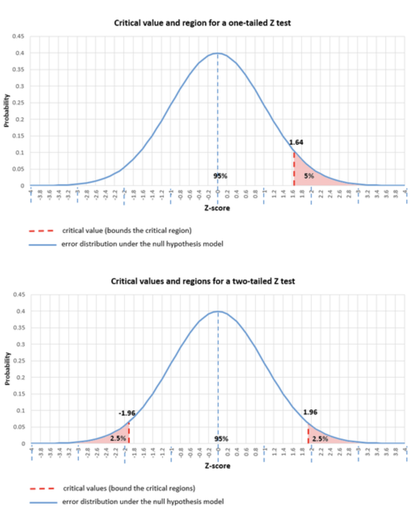

### For example the probability of being more than c. 1.64 standard deviations from the mean is has a 5% probability

In [ ]:
# Rearranging the formula for z

critical_value = 1.64 * df.Height.std() + df.Height.mean()
critical_value

### We can now check the probability of being taller than 72.68

In [ ]:
p_value = stats.norm(df.Height.mean(),df.Height.std()).sf(72.68)

p_value

## Summary

In this section we have got familiar with the normal distribution.

You should:
- be comfortable with the concept of a normal distribution
- understand when we can use it as a model
- know how to calculate p-values and z-scores for different values of a normally distributed random variable
- understand what the p-values and z-scores mean and how they might indicate statistical significance

## Break Time. 

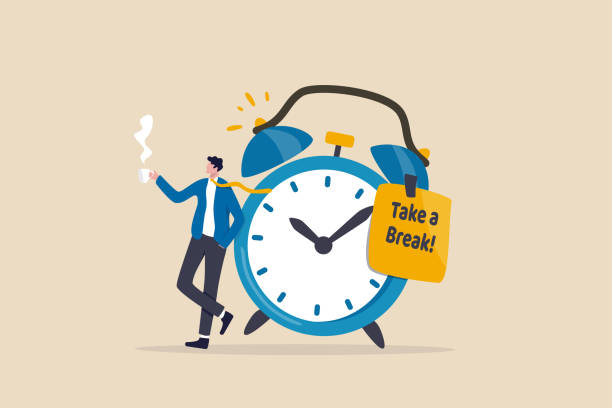

# Linear Algebra
## Matrices, Vectors, and Dot Products


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D

## Learning outcomes

- Understand how and why linear algebra is useful for **analyzing data**
- Learn how to think about **high-dimensional vectors** and their geometry
- Learn how to perform elementary linear algebra operations with `numpy`

**Note**: this learning unit contains mostly mathematical theory, along with practical examples for elementary linear algebra computations with `numpy`.

## What is linear algebra?

Linear algebra is a set of mathematical tools that give us techiques to manipulate groups of numbers simultaneously. It is in essence the study of techniques for manipulating and characterizing **vectors** and **matrices**.

### What is a vector?
> An $M$-dimensional **vector** is a collection of $M$ numbers 

$$\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_M \end{bmatrix} $$



### What is a matrix?
An $M \times N$ array of numbers

$$\mathbf{A} = \begin{bmatrix} A_{11} & A_{12} & \ldots & A_{1N} \\ A_{21} & A_{22} & \ldots & A_{2N} \\ \vdots & \vdots & \vdots & \vdots \\ A_{M1} & A_{M2} & \ldots & A_{MN} \end{bmatrix}$$

- $M$ is the number of rows, $N$ is the number of columns
- $A_{ij}$ is the element of the matrix $\mathbf{A}$ in the $i$th row and $j$th column

#### Here we are defining two vectors algebraically 

In [ ]:
u = np.array([1,2])
v = np.array([-2,3])
print(u)
print(v)

####  Visualising vectors in 2D 
This is for visual aid. You don't need to be able to recreate this. 

In [ ]:
plt.plot([0,u[0]],[0,u[1]],'r',label='row vector')

plt.plot([0,v[0]],[0,v[1]],'b',label='column vector')

plt.axis('square')
plt.axis ([-5,5,-5,5])
plt.grid()
plt.legend();

### Visualising vectors in 3D


In [ ]:

v = np.array([2, 0, -1])
w = np.array([-1, 4, 5])

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0,v[0]],[0,v[1]],[0,v[2]],'b',linewidth=3)
ax.plot([0,w[0]],[0,w[1]],[0,w[2]],'r',linewidth=3)

ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)

plt.show()

### Applications

The numerical data you work with on a daily basis is just a collection of vectors and matrices.

Linear algebra has many applications in the field of data science and its laws form the basis of machine learning. It's so useful to us because it turns complicated problems into efficiently calculated problems.

So understanding a bit of the maths behind linear algebra will give you an insight into how algorithms work behind the scenes in Python.

In addition visualisations of data as vectors in 2D & 3D can help to provide insights into data.

**Example:** heights and weights of various athletes can be seen as a collection of two-dimensional vectors containing the height and weight of each athlete

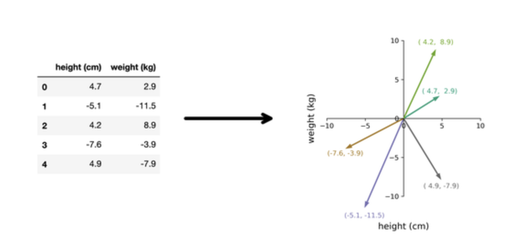

# Manipulating vectors

Just as we can add, subtract, multiply and divide numbers, the same operations can be performed on **vectors** using the laws of linear algebra. 

<div class="grid-layout-1-3"><div class="grid-item center"><h3><strong>Scalar multiplication</strong></h3>
    
<p>$$\mathbf{u} = a\mathbf{v}$$
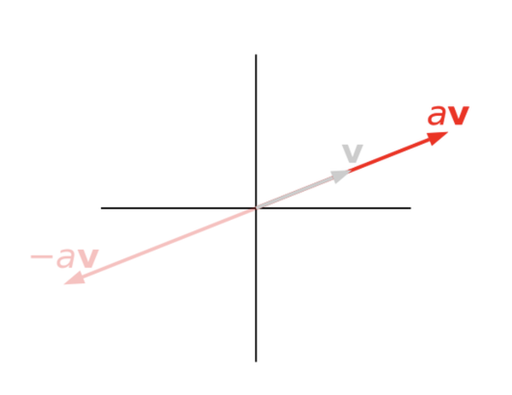</p>
</div><div class="grid-item center"><h3><strong>Vector addition</strong></h3>
<p>$$\mathbf{u} = \mathbf{v} + \mathbf{w}$$
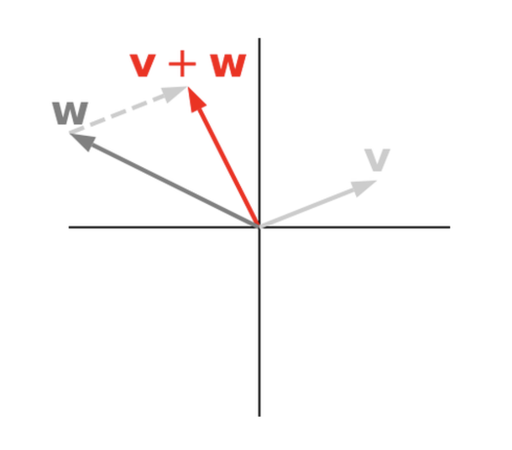</p>
</div><div class="grid-item center"><h3><strong>Linear combination</strong></h3>
<p>$$\mathbf{u} = a\mathbf{v} + b\mathbf{w}$$
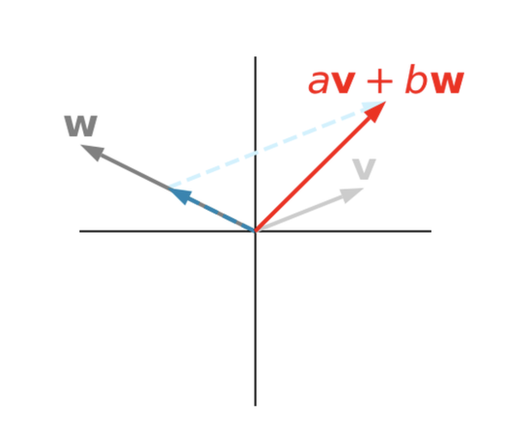</p>
</div></div><div class="grid-layout-footnote"></div>

# Characterizing vectors

<div class="grid-layout-1-2"><div class="grid-item left"><h2><strong>Vector norm</strong></h2>
</div><div class="grid-item left"><h4>How "big" is a vector?</h4>
</div></div><div class="grid-layout-footnote"></div>

<div class="grid-layout-1-2"><div class="grid-item left"><ul>
<li><strong>$L^2$ norm</strong>: use Pythagoras theorem!
$$||\mathbf{v}||_2 = \sqrt{v_1^2 + v_2^2 + \ldots + v_M^2}$$</li>
<li><strong>$L^1$ norm</strong>: how many "blocks" do you have to travel? (the "Manhattan norm")
$$||\mathbf{v}||_1 = |v_1| + |v_2| + \ldots + |v_M|$$</li>
<li><strong>$L^\infty$ norm</strong>: largest element of the vector
$$||\mathbf{v}||_\infty = \max { |v_1|, |v_2|, \ldots, |v_M| } $$</li>
</ul>
</div><div class="grid-item left"><p>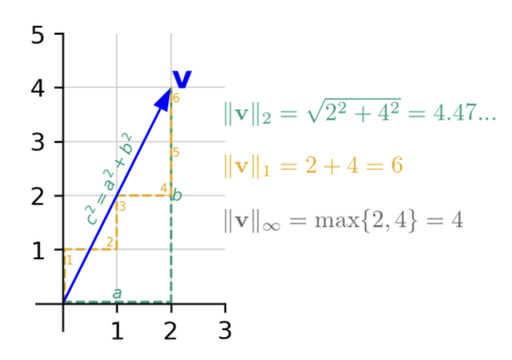</p>
</div></div><div class="grid-layout-footnote"></div>

A simple property of a vector that we might want to know is how "big" it is. But it's not really obvious how to quantify this -- what does it mean for a collection of numbers to be "big"?

For example, we might say that a collection of $M$ numbers is "big" if
* when plotted as a point on $M$ axes, this point is far away from the origin
* the $M$ numbers are all far from 0 -- that is, their absolute values are large
* one of the $M$ numbers is very far from 0

There is no single true answer but linear algebra provides us with a systematic way for deriving different answers, uusing **vector norm**. 

### Applications

In machine learning, vector norms are often used to ensure that vectors of parameters don't get too "big" when being optimized. Typically, the $L^1$ or $L^2$ norms are used, or a combination thereof.

### Vector norms in `numpy`
- use `linalg.norm()` function
- pick which norm using `ord` argument

In [ ]:
v = np.random.randn(2)                     # a random 2D vector
norm_L1 = np.linalg.norm(v, ord=1)         # calculate L1 norm
norm_L2 = np.linalg.norm(v, ord=2)         # calculate L2 norm
norm_Linf = np.linalg.norm(v, ord=np.inf)  # calculate L-infinity norm

print(norm_L1)
print(norm_L2)
print(norm_Linf)

## Dot product

The dot product is perhaps the **most important operation** in all of linear algebra.

Each corresponding pair of elements between two vectors is multiplied together and then the results are added up into one single number.

We can explain this calculation using mathematical symbols:

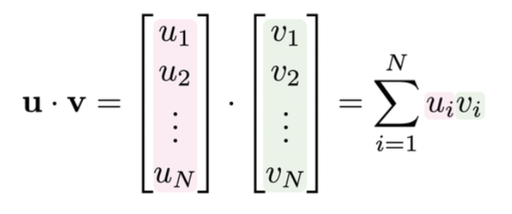

### Applications

The dot product can be used as a way of measuring the "overlap" between two vectors. In this way, it can be used to indicate how **similar** a pair of vectors are to one another.

In [ ]:
v = np.arange(10,22,3)
w = np.arange(5,15,3)

# Working out the dot product using the numpy function
dp1 = np.dot(v,w)
dp1

## Summary

You should now:

- know that we can represent rows and columns of data as vectors, and grids of data as matrices
- understand the importance of linear algebra in underpinning manipulation of data "behind the scenes" in Python
- know how to define the magnitude of a vector
- know how to calculate the dot product of two vectors